In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import cv2

dataDirectory = '/content/drive/My Drive/DataSet_Split'
categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# dataDirectory = '/content/drive/My Drive/Datasets/image'
# categories = ['fabric', 'foliage', 'glass', 'leather', 'metal', 'paper', 'plastic', 'stone', 'water', 'wood']

In [0]:
features = []
labels = []
image_size = 100

def create_training_data():
  for category in categories:
    path = os.path.join (dataDirectory, category)
    classNumber = categories.index(category)
    for image in os.listdir (path):
      try:
        imageRead = cv2.imread(os.path.join(path, image), cv2.IMREAD_UNCHANGED)
        imageArray = cv2.resize(imageRead, (image_size, image_size))
        features.append (imageArray)
        labels.append (classNumber)
      except Exception as e:
        pass

create_training_data()

In [13]:
print (len (features))
print (len (labels))

1977
1977


In [0]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split (features, labels, test_size = 0.2, random_state = 42)

In [15]:
import numpy as np
X_train = np.asarray (X_train)
X_test = np.asarray (X_test)
y_train = np.asarray (y_train)
y_test = np.asarray (y_test)

print (type (X_train))
print (type (X_test))
print (type (y_train))
print (type (y_test))

# print ((X_train.shape))
# print ((X_test.shape))
# print ((y_train.shape))
# print ((y_test.shape))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
# X_train = X_train / 255
# X_test = X_test / 255

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

model = Sequential()

model.add (Conv2D (32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)))
model.add (MaxPooling2D (pool_size = (2, 2)))
model.add (BatchNormalization ())

model.add (Conv2D (64, (3, 3), activation = 'relu'))
model.add (MaxPooling2D (pool_size = (2, 2)))
model.add (BatchNormalization ())

model.add (Conv2D (96, (3, 3), activation = 'relu'))
model.add (MaxPooling2D (pool_size = (2, 2)))
model.add (BatchNormalization ())

model.add (Conv2D (32, (3, 3), activation = 'relu'))
model.add (MaxPooling2D (pool_size = (2, 2)))
model.add (BatchNormalization ())
model.add (Dropout(0.2))

model.add (Flatten())

model.add (Dense (1000, activation = 'softmax'))

model.add (Dense (6, activation = 'softmax'))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.compile (optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 49, 49, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 96)     

In [23]:
history = model.fit (X_train, y_train, epochs = 100, validation_split = 0.2)

Train on 1264 samples, validate on 317 samples
Epoch 1/100
1264/1264 [==============================] - 24s 19ms/step - loss: 0.2989 - acc: 0.9415 - val_loss: 1.2065 - val_acc: 0.6278
Epoch 2/100
1264/1264 [==============================] - 24s 19ms/step - loss: 0.2861 - acc: 0.9454 - val_loss: 2.4247 - val_acc: 0.3722
Epoch 3/100
1264/1264 [==============================] - 24s 19ms/step - loss: 0.2930 - acc: 0.9446 - val_loss: 2.8569 - val_acc: 0.2650
Epoch 4/100
1264/1264 [==============================] - 24s 19ms/step - loss: 0.3113 - acc: 0.9343 - val_loss: 2.3091 - val_acc: 0.3785
Epoch 5/100
1264/1264 [==============================] - 24s 19ms/step - loss: 0.3183 - acc: 0.9296 - val_loss: 1.9756 - val_acc: 0.4038
Epoch 6/100
1264/1264 [==============================] - 24s 19ms/step - loss: 0.3019 - acc: 0.9343 - val_loss: 1.5428 - val_acc: 0.5521
Epoch 7/100
1264/1264 [==============================] - 24s 19ms/step - loss: 0.2940 - acc: 0.9407 - val_loss: 1.4432 - val_acc: 0

In [0]:
test_directory = '/content/drive/My Drive/DataSet_Split/Testing'
test_categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

featuresTest = []
labelsTest = []
image_size = 100

def create_testing_data():
  for category in test_categories:
    path = os.path.join (test_directory, category)
    classNumber = test_categories.index(category)
    for image in os.listdir (path):
      try:
        imageRead = cv2.imread(os.path.join(path, image), cv2.IMREAD_UNCHANGED)
        imageArray = cv2.resize(imageRead, (image_size, image_size))
        featuresTest.append (imageArray)
        labelsTest.append (classNumber)
      except Exception as e:
        pass

create_testing_data()

In [26]:
print (type (featuresTest))
print (type (labelsTest))
print (len (featuresTest))
print (len (labelsTest))

featuresTest = np.asarray (featuresTest)
labelsTest = np.asarray (labelsTest) 
lables_test = to_categorical(labelsTest)

<class 'list'>
<class 'list'>
550
550


In [29]:
loss, accuracy = model.evaluate (featuresTest, lables_test)
print (accuracy)

550/550 [==============================] - 3s 6ms/step
0.641818182034926


<function matplotlib.pyplot.show>

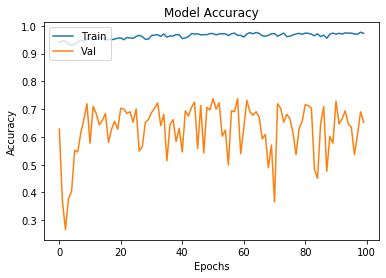

In [30]:
import matplotlib.pyplot as plt

plt.plot (history.history ['acc'])
plt.plot (history.history ['val_acc'])
plt.title ("Model Accuracy")
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy")
plt.legend (['Train', 'Val'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show>

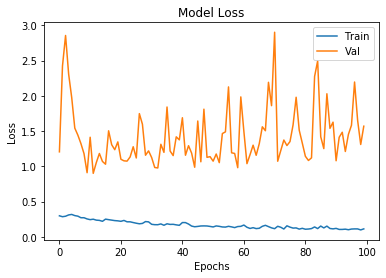

In [31]:
plt.plot (history.history ['loss'])
plt.plot (history.history ['val_loss'])
plt.title ("Model Loss")
plt.xlabel ("Epochs")
plt.ylabel ("Loss")
plt.legend (['Train', 'Val'], loc = 'upper right')
plt.show

In [0]:
predicted_value = model.predict_classes (featuresTest)

In [0]:
from PIL import Image

for i in range (len (predicted_value)):
  image = Image.fromarray(np.uint8 (featuresTest[i], 'RGB')
  image.show()
  print (predicted_value[i])
  break

0


In [0]:
type(featuresTest[i])

numpy.ndarray

In [0]:
for i in range (len (predicted_value)):
  print (featuresTest[i], predicted_value[i])

[[[160 183 209]
  [161 184 210]
  [160 182 208]
  ...
  [ 85 104 125]
  [ 78  97 118]
  [ 74  93 114]]

 [[164 187 213]
  [158 181 207]
  [158 181 207]
  ...
  [ 83 102 123]
  [ 80  99 120]
  [ 73  92 113]]

 [[160 183 209]
  [155 178 203]
  [157 180 206]
  ...
  [ 86 105 126]
  [ 83 102 123]
  [ 80  99 120]]

 ...

 [[189 210 237]
  [188 209 236]
  [184 205 232]
  ...
  [119 142 168]
  [124 147 173]
  [119 142 168]]

 [[186 207 234]
  [188 209 236]
  [184 205 232]
  ...
  [118 141 167]
  [123 146 172]
  [123 146 172]]

 [[188 209 236]
  [189 211 238]
  [182 203 230]
  ...
  [121 144 170]
  [122 145 171]
  [119 142 169]]] 0
[[[118 156 186]
  [119 157 187]
  [115 153 182]
  ...
  [220 223 227]
  [219 222 226]
  [219 222 226]]

 [[117 155 185]
  [118 155 186]
  [116 154 184]
  ...
  [220 223 227]
  [219 222 226]
  [219 222 226]]

 [[117 155 185]
  [117 155 185]
  [119 157 187]
  ...
  [219 222 226]
  [219 222 226]
  [219 222 226]]

 ...

 [[ 10  33  59]
  [ 10  33  59]
  [ 10  33  59]
  